In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
idx = ['year',
        'gisjoin',
        'state',
        'county']

sex_maritals = ['male_never_married',
                'male_married',
                'male_separated',
                'male_widowed',
                'male_divorced',
                'female_never_married',
                'female_married',
                'female_separated',
                'female_widowed',
                'female_divorced']

nativities = ['persons_native', 
              'persons_foreign_born']

sex_age_edus = ['male_18_24_less_than_9th',
                'male_18_24_some_hs',
                'male_18_24_hs_grad',
                'male_18_24_some_college',
                'male_18_24_associates',
                'male_18_24_bachelors',
                'male_18_24_graduate',
                'male_25_34_less_than_9th',
                'male_25_34_some_hs',
                'male_25_34_hs_grad',
                'male_25_34_some_college',
                'male_25_34_associates',
                'male_25_34_bachelors',
                'male_25_34_graduate',
                'male_35_44_less_than_9th',
                'male_35_44_some_hs',
                'male_35_44_hs_grad',
                'male_35_44_some_college',
                'male_35_44_associates',
                'male_35_44_bachelors',
                'male_35_44_graduate',
                'male_45_64_less_than_9th',
                'male_45_64_some_hs',
                'male_45_64_hs_grad',
                'male_45_64_some_college',
                'male_45_64_associates',
                'male_45_64_bachelors',
                'male_45_64_graduate',
                'male_65plus_less_than_9th',
                'male_65plus_some_hs',
                'male_65plus_hs_grad',
                'male_65plus_some_college',
                'male_65plus_associates',
                'male_65plus_bachelors',
                'male_65plus_graduate',
                'female_18_24_less_than_9th',
                'female_18_24_some_hs',
                'female_18_24_hs_grad',
                'female_18_24_some_college',
                'female_18_24_associates',
                'female_18_24_bachelors',
                'female_18_24_graduate',
                'female_25_34_less_than_9th',
                'female_25_34_some_hs',
                'female_25_34_hs_grad',
                'female_25_34_some_college',
                'female_25_34_associates',
                'female_25_34_bachelors',
                'female_25_34_graduate',
                'female_35_44_less_than_9th',
                'female_35_44_some_hs',
                'female_35_44_hs_grad',
                'female_35_44_some_college',
                'female_35_44_associates',
                'female_35_44_bachelors',
                'female_35_44_graduate',
                'female_45_64_less_than_9th',
                'female_45_64_some_hs',
                'female_45_64_hs_grad',
                'female_45_64_some_college',
                'female_45_64_associates',
                'female_45_64_bachelors',
                'female_45_64_graduate',
                'female_65plus_less_than_9th',
                'female_65plus_some_hs',
                'female_65plus_hs_grad',
                'female_65plus_some_college',
                'female_65plus_associates',
                'female_65plus_bachelors',
                'female_65plus_graduate']

labors = ['labor_force_total',
            'labor_force_armed',
            'labor_force_civilian',
            'labor_force_employed',
            'labor_force_unemployed',
            'not_in_labor_force']

households = ['households_total',
              'households_income_under_10k', 
              'households_income_10k_15k',
              'households_income_15k_25k',
              'households_income_25k_plus']

sexes = ['persons_male',
         'persons_female']

incomes = ['median_household_income',
           'per_capita_income']

sex_races = ['male_white',
            'female_white',
            'male_black',
            'female_black',
            'male_aian',
            'female_aian',
            'male_asian',
            'female_asian',
            'male_nhpi',
            'female_nhpi',
            'male_other',
            'female_other',
            'male_multi',
            'female_multi']

targets = ['democrat',
        'other',
        'republican',
        'non_voter']

misc_persons = ['persons_hispanic',
                'persons_below_poverty']

land = ['land_area_sqkm']

# combine all columns which contain features that count persons
person_cols = sexes + sex_maritals + sex_age_edus + sex_races + nativities +  labors + misc_persons + targets

len(person_cols)

110

In [9]:
years = [2008, 2012, 2016, 2020]
df_2008 = pd.read_csv('../data/probabilities_2008.csv')
df_2012 = pd.read_csv('../data/probabilities_2012.csv')
df_2016 = pd.read_csv('../data/probabilities_2016.csv')
df_2020 = pd.read_csv('../data/probabilities_2020.csv')

In [12]:
#concatenate all years into a single dataframe
df = pd.concat([df_2008, df_2012, df_2016, df_2020], axis=0)
df

,year,gisjoin,state,county,P(C),P(households_income_under_10k|C),P(households_income_10k_15k|C),P(households_income_15k_25k|C),P(households_income_25k_plus|C),P(persons_male|C),...,P(labor_force_civilian|C),P(labor_force_employed|C),P(labor_force_unemployed|C),P(not_in_labor_force|C),P(persons_hispanic|C),P(persons_below_poverty|C),P(democrat|C),P(other|C),P(republican|C),P(non_voter|C)
0,2008,G0100010,Alabama,Autauga County,0.000177,0.066741,0.050512,0.087433,0.795314,0.484997,...,0.469739,0.457925,0.030308,0.257643,0.023196,0.105785,0.114627,0.002728,0.327401,0.555244
1,2008,G0100030,Alabama,Baldwin County,0.000586,0.059675,0.048261,0.118775,0.773289,0.488660,...,0.456428,0.446667,0.031361,0.315852,0.038955,0.120689,0.110279,0.004301,0.348545,0.536876
2,2008,G0100050,Alabama,Barbour County,0.000092,0.173047,0.098418,0.139867,0.588668,0.528972,...,0.377342,0.357739,0.037944,0.405321,0.045958,0.223943,0.205675,0.002419,0.211777,0.580129
3,2008,G0100070,Alabama,Bibb County,0.000075,0.073512,0.073512,0.151458,0.701519,0.537904,...,0.461831,0.434277,0.043653,0.316541,0.005927,0.125166,0.101681,0.003671,0.276957,0.617691
4,2008,G0100090,Alabama,Blount County,0.000189,0.084543,0.060180,0.130114,0.725164,0.495308,...,0.451986,0.435793,0.035472,0.310802,0.074896,0.132470,0.062125,0.006280,0.359645,0.571950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,2020,G5600370,Wyoming,Sweetwater County,0.000129,0.052158,0.028344,0.066728,0.852770,0.517907,...,0.528031,0.497873,0.030158,0.245063,0.162076,0.114855,0.090853,0.015352,0.290620,0.603175
3086,2020,G5600390,Wyoming,Teton County,0.000071,0.018766,0.020943,0.058994,0.901296,0.518890,...,0.663069,0.649190,0.013878,0.180245,0.151975,0.068791,0.421828,0.025615,0.185942,0.366615
3087,2020,G5600410,Wyoming,Uinta County,0.000063,0.020301,0.033087,0.052597,0.894015,0.508420,...,0.481894,0.465395,0.016500,0.271294,0.098559,0.064003,0.077436,0.018106,0.364840,0.539618
3088,2020,G5600430,Wyoming,Washakie County,0.000024,0.037493,0.032220,0.106913,0.823374,0.523625,...,0.522071,0.512751,0.009320,0.293204,0.142783,0.065113,0.084272,0.017605,0.420065,0.478058


In [13]:
df.to_csv('../data/probabilities.csv', index=False)

In [11]:
df_2008[[f'P({col}|C)' for col in sex_races]].sum(axis=1).describe()

count    3.090000e+03
mean     1.000000e+00
std      4.392240e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [4]:
data = pd.read_csv('../data/dataset.csv')
data

,year,gisjoin,state,county,persons_total,persons_male,persons_female,persons_hispanic,households_total,male_never_married,...,female_nhpi,male_other,female_other,male_multi,female_multi,democrat,other,republican,non_voter,land_area_sqkm
0,2008,G0100010,Alabama,Autauga County,53155,25780,27375,1233,19718,5553,...,0,177,147,307,469,6093,145,17403,29514,1565.309074
1,2008,G0100030,Alabama,Baldwin County,175791,85902,89889,6848,69476,16489,...,6,2036,1048,1310,1086,19386,756,61271,94378,5250.611951
2,2008,G0100050,Alabama,Barbour County,27699,14652,13047,1273,9795,4406,...,3,272,254,250,117,5697,67,5866,16069,2342.683550
3,2008,G0100070,Alabama,Bibb County,22610,12162,10448,134,7441,3015,...,0,0,0,32,14,2299,83,6262,13966,1621.761112
4,2008,G0100090,Alabama,Blount County,56692,28080,28612,4246,20605,5012,...,0,414,509,329,276,3522,356,20389,32425,1685.119450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355,2020,G5600370,Wyoming,Sweetwater County,42079,21793,20286,6820,16335,5364,...,2,1130,698,1434,1785,3823,646,12229,25381,27171.988311
12356,2020,G5600390,Wyoming,Teton County,23346,12114,11232,3548,9645,3847,...,0,1147,1218,420,643,9848,598,4341,8559,10922.649458
12357,2020,G5600410,Wyoming,Uinta County,20546,10446,10100,2025,7586,2241,...,0,214,253,642,558,1591,372,7496,11087,5408.258287
12358,2020,G5600430,Wyoming,Washakie County,7725,4045,3680,1103,3414,837,...,0,188,101,377,325,651,136,3245,3693,5808.569009


In [36]:
households

['households_total',
 'households_income_under_10k',
 'households_income_10k_15k',
 'households_income_15k_25k',
 'households_income_25k_plus']

In [5]:
years = [2008, 2012, 2016, 2020]
dfs = {}
for year in years:
    df = data[data['year'] == year].copy()
    df.reset_index(drop=True, inplace=True)
    df2 = df[idx].copy()  # keep only the index columns

    # probability of living in a county
    df2['P(C)'] = df['persons_total'] / df['persons_total'].sum()

    # probability of feature given the county, for person cols
    df_persons = pd.DataFrame({f'P({col}|C)': df[col] / df['persons_total'] for col in person_cols})

    # probability of feature given the county for households
    df_households = pd.DataFrame({f'P({col}|C)': df[col] / df['households_total'] for col in households[1:]})

    df2 = pd.concat([df2, df_households, df_persons], axis=1)

    # Store the dataframe for each year
    dfs[year] = df2

In [7]:
# save to csv
for year in years:
    dfs[year].to_csv(f'../data/probabilities_{year}.csv', index=False)
    print(f"Saved dataset_{year}_probabilities.csv")

Saved dataset_2008_probabilities.csv
Saved dataset_2012_probabilities.csv
Saved dataset_2016_probabilities.csv
Saved dataset_2020_probabilities.csv


In [6]:
dfs[2008]

,year,gisjoin,state,county,P(C),P(households_income_under_10k|C),P(households_income_10k_15k|C),P(households_income_15k_25k|C),P(households_income_25k_plus|C),P(persons_male|C),...,P(labor_force_civilian|C),P(labor_force_employed|C),P(labor_force_unemployed|C),P(not_in_labor_force|C),P(persons_hispanic|C),P(persons_below_poverty|C),P(democrat|C),P(other|C),P(republican|C),P(non_voter|C)
0,2008,G0100010,Alabama,Autauga County,0.000177,0.066741,0.050512,0.087433,0.795314,0.484997,...,0.469739,0.457925,0.030308,0.257643,0.023196,0.105785,0.114627,0.002728,0.327401,0.555244
1,2008,G0100030,Alabama,Baldwin County,0.000586,0.059675,0.048261,0.118775,0.773289,0.488660,...,0.456428,0.446667,0.031361,0.315852,0.038955,0.120689,0.110279,0.004301,0.348545,0.536876
2,2008,G0100050,Alabama,Barbour County,0.000092,0.173047,0.098418,0.139867,0.588668,0.528972,...,0.377342,0.357739,0.037944,0.405321,0.045958,0.223943,0.205675,0.002419,0.211777,0.580129
3,2008,G0100070,Alabama,Bibb County,0.000075,0.073512,0.073512,0.151458,0.701519,0.537904,...,0.461831,0.434277,0.043653,0.316541,0.005927,0.125166,0.101681,0.003671,0.276957,0.617691
4,2008,G0100090,Alabama,Blount County,0.000189,0.084543,0.060180,0.130114,0.725164,0.495308,...,0.451986,0.435793,0.035472,0.310802,0.074896,0.132470,0.062125,0.006280,0.359645,0.571950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,2008,G5600370,Wyoming,Sweetwater County,0.000141,0.036308,0.031252,0.073957,0.858483,0.519496,...,0.544717,0.532745,0.026381,0.201580,0.138385,0.080609,0.136327,0.016822,0.245114,0.601737
3086,2008,G5600390,Wyoming,Teton County,0.000069,0.027979,0.012182,0.095181,0.864659,0.522450,...,0.628593,0.620854,0.025719,0.173541,0.129651,0.082348,0.359196,0.015479,0.219450,0.405874
3087,2008,G5600410,Wyoming,Uinta County,0.000068,0.062921,0.041077,0.097816,0.798187,0.507474,...,0.507815,0.497638,0.030628,0.204752,0.079661,0.119881,0.112821,0.016458,0.280615,0.590106
3088,2008,G5600430,Wyoming,Washakie County,0.000028,0.038247,0.049426,0.118270,0.794057,0.514932,...,0.497763,0.505018,0.023214,0.252932,0.122476,0.055132,0.125982,0.012332,0.357393,0.504292


In [39]:
for year in years:
    df = dfs[year]
    df.to_csv(f'../data/probabilities_{year}.csv', index=False)

In [40]:
list(dfs[2008].columns)

['year',
 'gisjoin',
 'state',
 'county',
 'P(C)',
 'P(households_total|C)',
 'P(households_income_under_10k|C)',
 'P(households_income_10k_15k|C)',
 'P(households_income_15k_25k|C)',
 'P(households_income_25k_plus|C)',
 'P(persons_male|C)',
 'P(persons_female|C)',
 'P(male_never_married|C)',
 'P(male_married|C)',
 'P(male_separated|C)',
 'P(male_widowed|C)',
 'P(male_divorced|C)',
 'P(female_never_married|C)',
 'P(female_married|C)',
 'P(female_separated|C)',
 'P(female_widowed|C)',
 'P(female_divorced|C)',
 'P(male_18_24_less_than_9th|C)',
 'P(male_18_24_some_hs|C)',
 'P(male_18_24_hs_grad|C)',
 'P(male_18_24_some_college|C)',
 'P(male_18_24_associates|C)',
 'P(male_18_24_bachelors|C)',
 'P(male_18_24_graduate|C)',
 'P(male_25_34_less_than_9th|C)',
 'P(male_25_34_some_hs|C)',
 'P(male_25_34_hs_grad|C)',
 'P(male_25_34_some_college|C)',
 'P(male_25_34_associates|C)',
 'P(male_25_34_bachelors|C)',
 'P(male_25_34_graduate|C)',
 'P(male_35_44_less_than_9th|C)',
 'P(male_35_44_some_hs|C)'

In [44]:
df = dfs[2020]
(df['P(non_voter|C)'] + df[[f'P({col}|C)' for col in sex_age_edus]].sum(axis=1) - 1).describe()

count    3090.000000
mean        0.285927
std         0.073170
min         0.026042
25%         0.236873
50%         0.284008
75%         0.333236
max         0.735494
dtype: float64

In [149]:
for year in [2008, 2012, 2016, 2020]:
    df = data[data['year'] == year]
    df_probs = df[['year'] + idx].copy()

    # column for probability of living in a county
    df_probs['P(C)'] = df['persons_total'] / df['persons_total'].sum()

    # probability of voting democrat, given the county
    df_probs['P(d|C)'] = df['democrat'] / df['persons_total']

    # probability of voting republican, given the county
    df_probs['P(r|C)'] = df['republican'] / df['persons_total']

    # probability of voting other or not voting, given the county
    df_probs['P(o|C)'] = 1 - df_probs['P(d|C)'] - df_probs['P(r|C)']

    person_cols = sexes + sex_maritals + sex_age_edus + sex_age_races + labors + nativities

    # probability of feature given the county
    df_persons = pd.DataFrame({f'P({col}|C)': df[col] / df['persons_total'] for col in person_cols})

    # probability of household income range given the county
    df_households = pd.DataFrame({f'P({col}|C)': df[col] / df['households_total'] for col in households[1:]})

    # concatenate all the dataframes
    df_probs = pd.concat([df_probs, df_persons, df_households], axis=1)

    # save to csv
    df_probs.to_csv(f'../data/probabilities_{year}.csv', index=False)
    

['households_total',
 'households_income_under_10k',
 'households_income_10k_15k',
 'households_income_15k_25k',
 'households_income_25k_plus']

In [134]:
df[col] / country_total_persons

9294     4.747533e-06
9295     2.479607e-05
9296     2.373767e-06
9297     7.463906e-07
9298     8.696674e-06
             ...     
12387    7.454729e-06
12388    8.907743e-06
12389    1.379599e-06
12390    3.242516e-07
12391    2.018925e-07
Name: persons_foreign_born, Length: 3098, dtype: float64

/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_60972/3929696351.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_probs[f'P({col}|C)'] = df[col] / country_total_persons
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_60972/3929696351.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_probs[f'P({col}|C)'] = df[col] / country_total_persons
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_60972/3929696351.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(persons_male|C),P(persons_female|C),P(male_never_married|C),...,P(male_65plus_other|C),P(male_65plus_white|C),P(labor_force_total|C),P(labor_force_armed|C),P(labor_force_civilian|C),P(labor_force_employed|C),P(labor_force_unemployed|C),P(not_in_labor_force|C),P(persons_native|C),P(persons_foreign_born|C)
9294,G0100010,Alabama,Autauga County,0.000180,0.000023,0.000061,0.999916,0.000088,0.000092,0.000020,...,0.000000e+00,0.000010,0.000086,2.884616e-06,0.000083,0.000081,2.300351e-06,0.000058,0.000175,4.747533e-06
9295,G0100030,Alabama,Baldwin County,0.000714,0.000075,0.000256,0.999669,0.000349,0.000365,0.000074,...,5.444980e-07,0.000059,0.000342,2.101518e-06,0.000340,0.000328,1.170059e-05,0.000238,0.000689,2.479607e-05
9296,G0100050,Alabama,Barbour County,0.000076,0.000015,0.000017,0.999968,0.000040,0.000036,0.000015,...,1.621258e-07,0.000004,0.000027,0.000000e+00,0.000027,0.000026,1.578433e-06,0.000035,0.000074,2.373767e-06
9297,G0100070,Alabama,Bibb County,0.000068,0.000006,0.000023,0.999971,0.000036,0.000032,0.000012,...,0.000000e+00,0.000004,0.000028,0.000000e+00,0.000028,0.000025,2.404356e-06,0.000028,0.000067,7.463906e-07
9298,G0100090,Alabama,Blount County,0.000181,0.000008,0.000076,0.999916,0.000091,0.000089,0.000022,...,1.376540e-07,0.000013,0.000081,7.647444e-08,0.000081,0.000076,4.827067e-06,0.000064,0.000172,8.696674e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,G5600370,Wyoming,Sweetwater County,0.000129,0.000012,0.000037,0.999951,0.000067,0.000062,0.000016,...,5.506160e-08,0.000007,0.000068,1.437720e-07,0.000068,0.000064,3.881843e-06,0.000032,0.000121,7.454729e-06
12388,G5600390,Wyoming,Teton County,0.000071,0.000030,0.000013,0.999957,0.000037,0.000034,0.000012,...,1.315360e-07,0.000005,0.000047,0.000000e+00,0.000047,0.000046,9.911088e-07,0.000013,0.000063,8.907743e-06
12389,G5600410,Wyoming,Uinta County,0.000063,0.000005,0.000023,0.999972,0.000032,0.000031,0.000007,...,4.588467e-08,0.000004,0.000030,2.753080e-08,0.000030,0.000029,1.036993e-06,0.000017,0.000061,1.379599e-06
12390,G5600430,Wyoming,Washakie County,0.000024,0.000002,0.000010,0.999988,0.000012,0.000011,0.000003,...,6.423853e-08,0.000002,0.000012,0.000000e+00,0.000012,0.000012,2.202464e-07,0.000007,0.000023,3.242516e-07


In [125]:
df_probs

,gisjoin,state,county,persons_male,persons_female,male_never_married,male_married,male_separated,male_widowed,male_divorced,...,male_65plus_other,male_65plus_white,labor_force_total,labor_force_armed,labor_force_civilian,labor_force_employed,labor_force_unemployed,not_in_labor_force,persons_native,persons_foreign_born
0,G0100010,Alabama,Autauga County,0.484997,0.515003,0.104468,0.222256,0.009538,0.008184,0.037588,...,0.000000,0.039545,0.501082,0.012849,0.469739,0.457925,0.030308,0.257643,0.980152,0.019848
1,G0100030,Alabama,Baldwin County,0.488660,0.511340,0.093799,0.248022,0.005768,0.010968,0.038421,...,0.000296,0.065328,0.479279,0.001251,0.456428,0.446667,0.031361,0.315852,0.963508,0.036492
2,G0100050,Alabama,Barbour County,0.528972,0.471028,0.159067,0.201740,0.014802,0.010289,0.063685,...,0.000000,0.039893,0.395899,0.000217,0.377342,0.357739,0.037944,0.405321,0.971912,0.028088
3,G0100070,Alabama,Bibb County,0.537904,0.462096,0.133348,0.243919,0.029943,0.006413,0.053428,...,0.000000,0.044140,0.477930,0.000000,0.461831,0.434277,0.043653,0.316541,0.993233,0.006767
4,G0100090,Alabama,Blount County,0.495308,0.504692,0.088408,0.245767,0.006862,0.010072,0.046320,...,0.000000,0.057715,0.471742,0.000476,0.451986,0.435793,0.035472,0.310802,0.952815,0.047185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,G5600370,Wyoming,Sweetwater County,0.517907,0.482093,0.127475,0.220633,0.007486,0.014354,0.047244,...,0.000428,0.057463,0.529148,0.001117,0.528031,0.497873,0.030158,0.245063,0.942085,0.057915
12388,G5600390,Wyoming,Teton County,0.518890,0.481110,0.164782,0.229375,0.004155,0.002313,0.043862,...,0.001842,0.076973,0.663069,0.000000,0.663069,0.649190,0.013878,0.180245,0.875268,0.124732
12389,G5600410,Wyoming,Uinta County,0.508420,0.491580,0.109072,0.221162,0.003456,0.012703,0.049304,...,0.000730,0.067020,0.482332,0.000438,0.481894,0.465395,0.016500,0.271294,0.978049,0.021951
12390,G5600430,Wyoming,Washakie County,0.523625,0.476375,0.108350,0.238447,0.004531,0.018123,0.059806,...,0.002718,0.094757,0.522071,0.000000,0.522071,0.512751,0.009320,0.293204,0.986278,0.013722


In [87]:
# group features by category for easier access
# create a dictionary to hold the columns
# key = category, value = list of features
cols = {}

#id columns
cols['idx'] = cols_df[cols_df['category'] == 'id']['feature'].values.tolist()

# sex ~ age ~ education columns
cols['sex_age_edu'] = cols_df[cols_df['category'] == 'sex ~ age ~ education']['feature'].values.tolist()

# sex ~ age ~ race columns
cols['sex_age_race'] = cols_df[cols_df['category'] == 'sex ~ age ~ race']['feature'].values.tolist()

# sex ~ marital status columns
cols['sex_marital'] = cols_df[cols_df['category'] == 'sex ~ marital status']['feature'].values.tolist()

# household columns
cols['household'] = cols_df[cols_df['category'] == 'household']['feature'].values.tolist()

# labor force columns
cols['labor_force'] = cols_df[cols_df['category'] == 'labor force']['feature'].values.tolist()

# nativity columns
cols['nativity'] = cols_df[cols_df['category'] == 'nativity']['feature'].values.tolist()

# income columns
cols['income'] = cols_df[cols_df['category'] == 'income']['feature'].values.tolist()

# target columns
cols['target'] = cols_df[cols_df['category'] == 'target']['feature'].values.tolist()

# sex columns
cols['sex'] = ['persons_male','persons_female']

# miscallaneous columns
cols['misc'] = ['land_area_sqkm','persons_total', 'persons_below_poverty']

## Cols not in the dictionary: 'year', 'persons_hispanic' (because it is subsumed by 'other' )
# check = [col for sublist in cols.values() for col in sublist]
# set(df.columns) - set(check)

In [89]:
sexes = ['male','female']
ages = ['18_24', 
        '25_34', 
        '35_44', 
        '45_64', 
        '65_plus']
edus = ['less_than_9th', 
        'some_hs', 
        'hs_grad', 
        'some_college', 
        'associates', 
        'bachelors', 
        'graduate']
races = ['black',
         'white',
         'aian',
         'asian',
         'nhpi',
         'multi',
         'other']
maritals = ['never_married',
            'married',
            'separated',
            'divorced',
            'widowed']
years = [2008, 2012, 2016, 2020]

In [98]:
df = data[data['year'] == 2020]
df_probs = df[cols['idx']].copy()

# column for probability of living in a county
df_probs['P(C)'] = df['persons_total'] / df['persons_total'].sum()

# probability of voting democrat, given the county
df_probs['P(d|C)'] = df['democrat'] / df['persons_total']

# probability of voting republican, given the county
df_probs['P(r|C)'] = df['republican'] / df['persons_total']

# probability of voting other or not voting, given the county
df_probs['P(o|C)'] = 1 - df_probs['P(d|C)'] - df_probs['P(r|C)']

df_probs.describe()

,P(C),P(d|C),P(r|C),P(o|C)
count,3.098000e+03,3098.000000,3098.000000,3098.000000
mean,3.227889e-04,0.165317,0.321905,0.512778
std,1.026014e-03,0.086681,0.094921,0.081740
min,6.607392e-07,0.016792,0.008198,0.048589
25%,3.382771e-05,0.098621,0.263734,0.460077
50%,7.938812e-05,0.144600,0.328792,0.511188
75%,2.081994e-04,0.216388,0.380663,0.564838
max,3.039611e-02,0.540248,0.782787,0.975010


In [ ]:
# build list of columns which represent counts of persons, to normalize by persons_total
person_cols = cols['labor_force'] + cols['nativity'] + cols['sex'] + cols['sex_age_edu'] + cols['sex_age_race'] + cols['sex_marital'] + ['persons_below_poverty']

# normalize by persons_total, add to df_probs
# name the columns as P(col|C)
for col in person_cols:
    df_probs.loc[:,f'P({col}|C)'] = df.loc[:,col] / df.loc[:,'persons_total']

In [115]:
df_sex_age_edus.columns

Index(['P(male_18_24_less_than_9th|C)', 'P(male_18_24_some_hs|C)',
       'P(male_18_24_hs_grad|C)', 'P(male_18_24_some_college|C)',
       'P(male_18_24_associates|C)', 'P(male_18_24_bachelors|C)',
       'P(male_18_24_graduate|C)', 'P(male_25_34_less_than_9th|C)',
       'P(male_25_34_some_hs|C)', 'P(male_25_34_hs_grad|C)',
       'P(male_25_34_some_college|C)', 'P(male_25_34_associates|C)',
       'P(male_25_34_bachelors|C)', 'P(male_25_34_graduate|C)',
       'P(male_35_44_less_than_9th|C)', 'P(male_35_44_some_hs|C)',
       'P(male_35_44_hs_grad|C)', 'P(male_35_44_some_college|C)',
       'P(male_35_44_associates|C)', 'P(male_35_44_bachelors|C)',
       'P(male_35_44_graduate|C)', 'P(male_45_64_less_than_9th|C)',
       'P(male_45_64_some_hs|C)', 'P(male_45_64_hs_grad|C)',
       'P(male_45_64_some_college|C)', 'P(male_45_64_associates|C)',
       'P(male_45_64_bachelors|C)', 'P(male_45_64_graduate|C)',
       'P(male_65plus_less_than_9th|C)', 'P(male_65plus_some_hs|C)',
       'P

In [113]:
df_sex_marital = df_probs[[ f'P({col}|C)' for col in cols['sex_marital']]]
df_sex_age_edus = df_probs[[f'P({col}|C)' for col in cols['sex_age_edu']]]
df_sex_marital.sum(axis=1) - df_sex_age_edus.sum(axis=1)

9294     0.060840
9295     0.052309
9296     0.061060
9297     0.055773
9298     0.059431
           ...   
12387    0.059246
12388    0.033625
12389    0.059282
12390    0.052557
12391    0.068705
Length: 3098, dtype: float64

In [116]:
df_sex_age_edus = df_sex_age_edus.div(df_sex_age_edus.sum(axis=1), axis=0)

In [118]:
df_sex_age_edus.sum(axis=1).value_counts()

1.0    727
1.0    726
1.0    388
1.0    374
1.0    285
1.0    212
1.0    150
1.0     84
1.0     65
1.0     46
1.0     19
1.0     18
1.0      2
1.0      2
Name: count, dtype: int64

In [102]:
set(df.columns) - set(person_cols)

{'county',
 'democrat',
 'gisjoin',
 'households_income_10k_15k',
 'households_income_15k_25k',
 'households_income_25k_plus',
 'households_income_under_10k',
 'households_total',
 'land_area_sqkm',
 'median_household_income',
 'other',
 'per_capita_income',
 'persons_hispanic',
 'persons_total',
 'republican',
 'state',
 'total_votes',
 'year'}

In [101]:
df_probs

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(labor_force_total|C),P(labor_force_armed|C),P(labor_force_civilian|C),...,P(male_married|C),P(male_separated|C),P(male_widowed|C),P(male_divorced|C),P(female_never_married|C),P(female_married|C),P(female_separated|C),P(female_widowed|C),P(female_divorced|C),P(persons_below_poverty|C)
9294,G0100010,Alabama,Autauga County,0.000180,0.127687,0.337605,0.534708,0.478310,0.016048,0.462262,...,0.224452,0.007624,0.014516,0.040435,0.105836,0.214853,0.007165,0.041201,0.058763,0.112830
9295,G0100030,Alabama,Baldwin County,0.000714,0.105295,0.357913,0.536792,0.478819,0.002943,0.475876,...,0.240074,0.004563,0.012248,0.043848,0.089393,0.240481,0.009232,0.042494,0.054575,0.100441
9296,G0100050,Alabama,Barbour County,0.000076,0.193592,0.225992,0.580416,0.360494,0.000000,0.360494,...,0.165494,0.013908,0.009326,0.068417,0.124010,0.167745,0.011054,0.050931,0.048438,0.212244
9297,G0100070,Alabama,Bibb County,0.000068,0.089254,0.338187,0.572559,0.405735,0.000000,0.405735,...,0.200171,0.016404,0.019595,0.052896,0.096355,0.178823,0.002607,0.047009,0.056851,0.193115
9298,G0100090,Alabama,Blount County,0.000181,0.044687,0.418285,0.537028,0.447873,0.000423,0.447450,...,0.229734,0.009733,0.016013,0.042961,0.077357,0.226586,0.007482,0.050764,0.049833,0.140105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,G5600370,Wyoming,Sweetwater County,0.000129,0.090853,0.290620,0.618527,0.529148,0.001117,0.528031,...,0.220633,0.007486,0.014354,0.047244,0.084223,0.208822,0.007201,0.036218,0.050738,0.114855
12388,G5600390,Wyoming,Teton County,0.000071,0.421828,0.185942,0.392230,0.663069,0.000000,0.663069,...,0.229375,0.004155,0.002313,0.043862,0.122291,0.232588,0.001928,0.018076,0.037994,0.068791
12389,G5600410,Wyoming,Uinta County,0.000063,0.077436,0.364840,0.557724,0.482332,0.000438,0.481894,...,0.221162,0.003456,0.012703,0.049304,0.074175,0.216733,0.007106,0.023557,0.062737,0.064003
12390,G5600430,Wyoming,Washakie County,0.000024,0.084272,0.420065,0.495663,0.522071,0.000000,0.522071,...,0.238447,0.004531,0.018123,0.059806,0.074563,0.228738,0.002589,0.037540,0.061100,0.065113


In [105]:
# divide household cols by households_total
household_cols = ['households_income_under_10k',
 'households_income_10k_15k',
 'households_income_15k_25k',
 'households_income_25k_plus']
for col in household_cols:
    df_probs.loc[:,f'P({col}|C)'] = df.loc[:,col] / df.loc[:,'households_total']

In [106]:
df_probs

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(labor_force_total|C),P(labor_force_armed|C),P(labor_force_civilian|C),...,P(female_never_married|C),P(female_married|C),P(female_separated|C),P(female_widowed|C),P(female_divorced|C),P(persons_below_poverty|C),P(households_income_under_10k|C),P(households_income_10k_15k|C),P(households_income_15k_25k|C),P(households_income_25k_plus|C)
9294,G0100010,Alabama,Autauga County,0.000180,0.127687,0.337605,0.534708,0.478310,0.016048,0.462262,...,0.105836,0.214853,0.007165,0.041201,0.058763,0.112830,0.044379,0.029406,0.105836,0.820378
9295,G0100030,Alabama,Baldwin County,0.000714,0.105295,0.357913,0.536792,0.478819,0.002943,0.475876,...,0.089393,0.240481,0.009232,0.042494,0.054575,0.100441,0.044603,0.042081,0.070131,0.843186
9296,G0100050,Alabama,Barbour County,0.000076,0.193592,0.225992,0.580416,0.360494,0.000000,0.360494,...,0.124010,0.167745,0.011054,0.050931,0.048438,0.212244,0.101708,0.082187,0.162822,0.653283
9297,G0100070,Alabama,Bibb County,0.000068,0.089254,0.338187,0.572559,0.405735,0.000000,0.405735,...,0.096355,0.178823,0.002607,0.047009,0.056851,0.193115,0.076081,0.091463,0.109340,0.723115
9298,G0100090,Alabama,Blount County,0.000181,0.044687,0.418285,0.537028,0.447873,0.000423,0.447450,...,0.077357,0.226586,0.007482,0.050764,0.049833,0.140105,0.066818,0.051882,0.084528,0.796772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,G5600370,Wyoming,Sweetwater County,0.000129,0.090853,0.290620,0.618527,0.529148,0.001117,0.528031,...,0.084223,0.208822,0.007201,0.036218,0.050738,0.114855,0.052158,0.028344,0.066728,0.852770
12388,G5600390,Wyoming,Teton County,0.000071,0.421828,0.185942,0.392230,0.663069,0.000000,0.663069,...,0.122291,0.232588,0.001928,0.018076,0.037994,0.068791,0.018766,0.020943,0.058994,0.901296
12389,G5600410,Wyoming,Uinta County,0.000063,0.077436,0.364840,0.557724,0.482332,0.000438,0.481894,...,0.074175,0.216733,0.007106,0.023557,0.062737,0.064003,0.020301,0.033087,0.052597,0.894015
12390,G5600430,Wyoming,Washakie County,0.000024,0.084272,0.420065,0.495663,0.522071,0.000000,0.522071,...,0.074563,0.228738,0.002589,0.037540,0.061100,0.065113,0.037493,0.032220,0.106913,0.823374


In [96]:
(df[['democrat','republican','other']].sum(axis=1)).sum() / df['persons_total'].sum()

np.float64(0.4775220688571113)

<Axes: xlabel='party', ylabel='Count'>

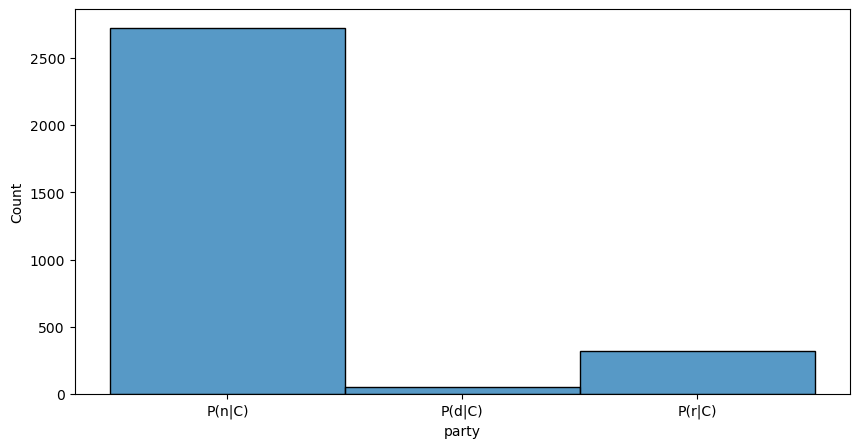

In [93]:
# add a column with value -1,0,1, depending on max(P(r|C), P(n|C), P(d|C))
df_probs['party'] = df_probs[['P(d|C)','P(r|C)','P(n|C)']].idxmax(axis=1)

#visualize histogram of 'party' column
plt.figure(figsize=(10,5))
sns.histplot(df_probs['party'], bins=3, discrete=True)

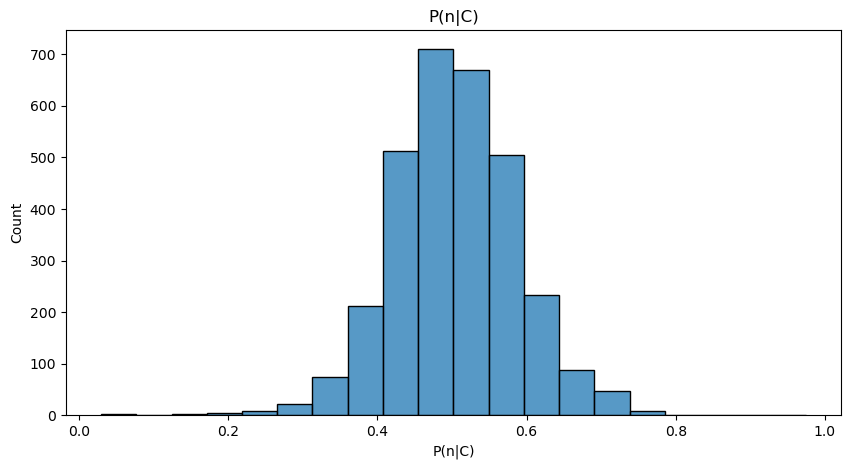

In [94]:
# plot histogram of P(n|C)
plt.figure(figsize=(10,5))
sns.histplot(df_probs['P(n|C)'], bins=20)
plt.title('P(n|C)')
plt.show()

In [74]:
df = data[data['year'] == 2016]
df_probs = df[cols['idx']].copy()

# column for probability of living in a county
df_probs['P(C)'] = df['persons_total'] / df['persons_total'].sum()

df_probs['P(d|C)'] = df['democrat'] / df['persons_total']
df_probs['P(r|C)'] = df['republican'] / df['persons_total']
df_probs['P(o|C)'] = df['other'] / df['persons_total']
df_probs['P(v|C)'] = df_probs[['P(d|C)','P(r|C)','P(o|C)']].sum(axis=1)
df_probs[df_probs['P(v|C)'] > 1]

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(v|C)
6273,G0200130,Alaska,Aleutians East Borough,0.000011,0.491679,1.176058,0.239708,1.907445
6274,G0200160,Alaska,Aleutians West Census Area,0.000018,0.572870,0.557043,0.163304,1.293217
7977,G3500210,New Mexico,Harding County,0.000001,0.339869,0.677560,0.130719,1.148148


In [75]:
df = data[data['year'] == 2012]
df_probs = df[cols['idx']].copy()

# column for probability of living in a county
df_probs['P(C)'] = df['persons_total'] / df['persons_total'].sum()

df_probs['P(d|C)'] = df['democrat'] / df['persons_total']
df_probs['P(r|C)'] = df['republican'] / df['persons_total']
df_probs['P(o|C)'] = df['other'] / df['persons_total']
df_probs['P(v|C)'] = df_probs[['P(d|C)','P(r|C)','P(o|C)']].sum(axis=1)
df_probs[df_probs['P(v|C)'] > 1]

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(v|C)
3170,G0200130,Alaska,Aleutians East Borough,0.000011,0.735740,0.933859,0.061893,1.731493
3171,G0200160,Alaska,Aleutians West Census Area,0.000018,0.710265,0.509027,0.051681,1.270973


In [76]:
df = data[data['year'] == 2008]
df_probs = df[cols['idx']].copy()

# column for probability of living in a county
df_probs['P(C)'] = df['persons_total'] / df['persons_total'].sum()

df_probs['P(d|C)'] = df['democrat'] / df['persons_total']
df_probs['P(r|C)'] = df['republican'] / df['persons_total']
df_probs['P(o|C)'] = df['other'] / df['persons_total']
df_probs['P(v|C)'] = df_probs[['P(d|C)','P(r|C)','P(o|C)']].sum(axis=1)
df_probs[df_probs['P(v|C)'] > 1]

,gisjoin,state,county,P(C),P(d|C),P(r|C),P(o|C),P(v|C)
67,G0200130,Alaska,Aleutians East Borough,0.000012,0.756144,2.277073,0.079395,3.112611
68,G0200160,Alaska,Aleutians West Census Area,0.000021,0.421154,1.242051,0.045854,1.709059
245,G0800530,Colorado,Hinsdale County,0.000002,0.490798,0.703476,0.030675,1.224949


In [77]:
df_probs.describe()

,P(C),P(d|C),P(r|C),P(o|C),P(v|C)
count,3.103000e+03,3103.000000,3103.000000,3103.000000,3103.000000
mean,3.222688e-04,0.187795,0.254169,0.007664,0.449628
std,1.031839e-03,0.075879,0.081435,0.008115,0.094058
min,7.302911e-07,0.008703,0.008921,0.000000,0.018075
25%,3.776839e-05,0.130151,0.210884,0.004315,0.400270
50%,8.624771e-05,0.179242,0.250221,0.006814,0.449368
75%,2.198009e-04,0.237222,0.292313,0.009502,0.500000
max,3.254049e-02,0.756144,2.277073,0.237492,3.112611


In [66]:
df_probs['log_odds_decisive'] = np.log(df_probs['Pr(democrat|C)'] + df_probs['Pr(republican|C)']) - np.log(df_probs['Pr(other|C)'] + df_probs['Pr(nonvoter|C)'])

/opt/anaconda3/envs/math392/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [67]:
df_probs['log_odds_decisive'].describe()

count    3100.000000
mean       -0.051856
std         0.348460
min        -3.663964
25%        -0.260645
50%        -0.044620
75%         0.160190
max         2.974542
Name: log_odds_decisive, dtype: float64

<Axes: >

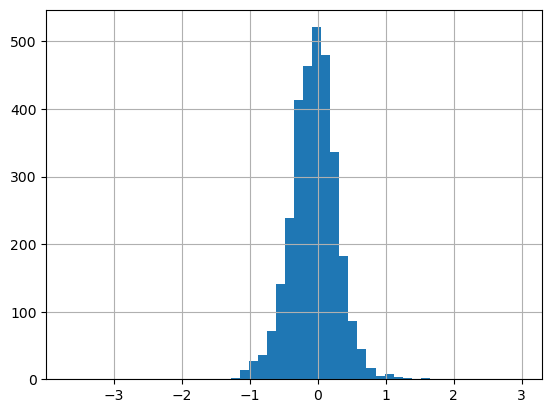

In [69]:
df_probs['log_odds_decisive'].hist(bins=50)

In [70]:
df_probs.describe()

,Pr(C),Pr(democrat|C),Pr(republican|C),Pr(other|C),Pr(nonvoter|C),log_odds_decisive
count,3.103000e+03,3103.000000,3103.000000,3103.000000,3103.000000,3100.000000
mean,3.222688e-04,0.165923,0.322674,0.008825,0.502577,-0.051856
std,1.025233e-03,0.088428,0.097915,0.005094,0.093714,0.348460
min,3.548302e-07,0.016792,0.008198,0.000000,-1.263869,-3.663964
25%,3.360181e-05,0.098623,0.263891,0.005702,0.450323,-0.260645
50%,7.920973e-05,0.144741,0.328967,0.008071,0.501906,-0.044620
75%,2.081202e-04,0.216841,0.381384,0.010845,0.556927,0.160190
max,3.039515e-02,0.818931,1.365424,0.115938,0.974208,2.974542


In [ ]:
persons_categories = ['sex',
              'sex_marital',
              'sex_age_edu',
              'sex_age_race',
              'nativity',
              'labor force',
              'target'
              ]